# TAREA:


# Regresion Lineal 
## Basado en Christensen, L y W. Greene (1976), "Economies of Scale in U.S. Electric Power Generation", Journal of Political Economy, Vol. 84, No. 4, pp. 655-676

A continuación, resuleva cada una las instrucciones que se le señalan

In [1]:
# Importamos Dependencias o Bibliotecas necesarias:
import pyreadstat # librería para leer formato ".dta"
import pandas as pd # librería para manipulación de datos
import numpy as np # Librería para operaciones matemáticas
import matplotlib # Librería para graficar
from matplotlib import pyplot as plt # Librería para graficar
import statsmodels.api as sm # Librería para análisis estadístico
from IPython.display import Image # Librería para importar imagénes
from statsmodels.formula.api import ols # Librería para pruebas de hipotesis

### La base de datos contiene información de 100 empresa de generación eléctrica, reportada en las siguientes variables:

* **firmid:** ID de la empresa
* **costs:** Total costs in MM USD
* **output:** output billion KwH
* **plabor:** price of labor
* **pfuel:** price of fuel
* **pkap:** price of capital
* **labshr:** participación del trabajo en el costo
* **kapshr:** participación del capital en el costo

## 1. Importe la base de DATOS:

In [2]:
# Ruta al archivo:
dtafile = 'Data/cgreene76.dta'
# La función read_dat devuelve dos objetos: el dataframe y los metadatos
dataframe , meta = pyreadstat.read_dta(dtafile)

In [3]:
# Muestre los datos importados
print(dataframe.head(10))


   firmid   costs  output       plabor       pkap      pfuel  labshr  kapshr
0     1.0  0.2130     8.0  6869.470215  64.945000  18.000000  0.3291  0.4197
1    20.0  0.4887    14.0  5438.890137  86.110001  34.150002  0.2994  0.4571
2    17.0  0.6159    50.0  9204.240234  90.470001  32.070000  0.2963  0.0981
3    14.0  0.7606    65.0  8971.889648  41.243000  28.539000  0.2802  0.1282
4    28.0  0.6363    67.0  6696.500000  58.257999  25.400000  0.2447  0.3674
5    22.0  1.1474    90.0  7189.669922  79.100998  21.503000  0.2855  0.2073
6    16.0  1.3422   183.0  5063.490234  74.430000  35.509998  0.0960  0.2629
7    15.0  2.2587   295.0  8218.400391  71.940002  39.200001  0.1772  0.1623
8    27.0  2.0532   374.0  7884.939941  82.458000  26.301399  0.2054  0.1208
9    30.0  3.1504   378.0  7895.430176  60.277000  42.468300  0.0980  0.1996


# Considere una función de costos del tipo translog, escrita como:

$$ln(C) = \alpha_0 +  \alpha_Y ln(Y) + \frac{1}{2} \gamma_{YY} (ln(Y))^2 + \sum_k \alpha_k ln(P_{k}) + \frac{1}{2} \sum_k \sum_j \gamma_{kj} ln(P_k) ln(P_j) + \sum_k \gamma_{Yk} ln(Y) ln(P_k) + \varepsilon_i$$

Este ecuación es equivalente a la que Christensen y Greene denominan Modelo A. Donde:
$\gamma_{kj} = \gamma_{jk}$, $C$ es el costo total, $Y$ es el producto, $P_k$'s son los precios de los factores. 

## 2. Realice las transformaciones necesarias en los datos para estimar la ecuación anterior:

In [4]:
dataframe['Ltotcost'] = np.log(dataframe['costs'])
dataframe['Loutput'] = np.log(dataframe['output'])

dataframe['Lplabor'] = np.log(dataframe['plabor'])
dataframe['Lpfuel'] = np.log(dataframe['pfuel'])
dataframe['Lpkap'] = np.log(dataframe['pkap'])

dataframe["Loutput_2"] = dataframe["Loutput"]**2
dataframe["Lplabor_2"] = dataframe["Lplabor"]**2
dataframe["Lpfuel_2"] = dataframe["Lpfuel"]**2
dataframe["Lpkap_2"] = dataframe["Lpkap"]**2



dataframe['Lplabor_pfuel'] = dataframe["Lplabor"]*dataframe["Lpfuel"]
dataframe['Lplabor_pkap'] = dataframe["Lplabor"]*dataframe["Lpkap"]
dataframe['Lpfuel_pkap'] = dataframe["Lpfuel"]*dataframe["Lpkap"]


dataframe['Loutpfuel'] = np.dot(dataframe['Loutput'] , dataframe['Lpfuel'])
dataframe['Loutplabor'] = np.dot(dataframe['Loutput'] , dataframe['Lplabor'])
dataframe['Loutpkap'] = np.dot(dataframe['Loutput'] , dataframe['Lpkap'])


dataframe['One'] = 1


In [5]:
# Muestre su data frame con las variables adicionales necesarias
dataframe.head()

,firmid,costs,output,plabor,pkap,pfuel,labshr,kapshr,Ltotcost,Loutput,...,Lplabor_2,Lpfuel_2,Lpkap_2,Lplabor_pfuel,Lplabor_pkap,Lpfuel_pkap,Loutpfuel,Loutplabor,Loutpkap,One
0,1.0,0.2130,8.0,6869.470215,64.945000,18.000000,0.3291,0.4197,-1.546463,2.079442,...,78.054438,8.354249,17.418442,25.535979,36.872574,12.063084,2767.75842,7346.072779,3500.306728,1
1,20.0,0.4887,14.0,5438.890137,86.110001,34.150002,0.2994,0.4571,-0.716006,2.639057,...,73.982883,12.466285,19.852599,30.369256,38.324307,15.731756,2767.75842,7346.072779,3500.306728,1
2,17.0,0.6159,50.0,9204.240234,90.470001,32.070000,0.2963,0.0981,-0.484671,3.912023,...,83.309788,12.026476,20.295190,31.653170,41.119192,15.623048,2767.75842,7346.072779,3500.306728,1
3,14.0,0.7606,65.0,8971.889648,41.243000,28.539000,0.2802,0.1282,-0.273648,4.174387,...,82.843702,11.231021,13.834542,30.502776,33.854168,12.464992,2767.75842,7346.072779,3500.306728,1
4,28.0,0.6363,67.0,6696.500000,58.257999,25.400000,0.2447,0.3674,-0.452085,4.204693,...,77.604476,10.463602,16.523261,28.496006,35.808924,13.148872,2767.75842,7346.072779,3500.306728,1


## 3. Realice la estimación de la regresión de la función translog: 

In [6]:
# Definición de vector y matriz: Y y X
Y = dataframe["Ltotcost"]
X = dataframe[["One","Loutput","Loutput_2","Lpfuel", "Lpkap", "Lplabor_2", "Lpfuel_2", "Lpkap_2","Lplabor_pfuel","Lplabor_pkap","Lpfuel_pkap","Loutpfuel", "Loutplabor",  "Lplabor", "Loutpkap"]]

In [7]:
# Resporte de la estimación:
est = sm.OLS(Y,X)
est2 = est.fit()
print(est2.summary())


print("\n Parametros \n ",est2.params)
print("\n Valores \n", est2.tvalues)
print("\n Fvalue \n", est2.fvalue)




                            OLS Regression Results                            
Dep. Variable:               Ltotcost   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     955.3
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           1.08e-85
Time:                        19:36:09   Log-Likelihood:                 60.196
No. Observations:                  99   AIC:                            -96.39
Df Residuals:                      87   BIC:                            -65.25
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
One           -9.778e-07   7.57e-07     -1.292

## 4. Pruebe cada una de las siguientes hipótesis 

En cada caso escriba sus conclusiones respecto a la prueba y qué significado tiene para la estimación, de acuerdo con el trabajo de Christensen y Greene (1976)

In [8]:
# Establecemos la formula de la ecuación estimada:
formula = 'Ltotcost ~  One + Loutput  + Lplabor + Lpfuel + Lpkap +Loutput_2 +Lplabor_2 +Lpfuel_2 +Lpkap_2 +  Lpfuel_pkap+ Lplabor_pfuel+ Lplabor_pkap + Loutpfuel+ Loutplabor + Loutpkap '
results = ols(formula, dataframe).fit()




### 4.1
$$H_0: \sum_k \alpha_k = 1$$

In [9]:
# Establecemos la hipótesis
hypotheses = 'Lplabor + Lpfuel + Lpkap = 1'


In [10]:
# Prueba de la hipótesis:
t_test = results.t_test(hypotheses)
print(t_test)
f_test = results.f_test(hypotheses)
print(f_test)


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            21.2023     15.594      1.296      0.199      -9.793      52.198
<F test: F=array([[1.67832676]]), p=0.19857382195881074, df_denom=87, df_num=1>


### 4.2
$$H_0: \sum_k \gamma_{Yk} = 0$$

In [11]:
# Establecemos la hipótesis
hypotheses_2 = 'Lplabor + Lpfuel + Lpkap = 1, Loutpfuel = 0,Loutpkap=0, Loutpkap = 0 '


In [12]:
# Prueba de la hipótesis:
t_test = results.t_test(hypotheses_2)
print(t_test)
f_test = results.f_test(hypotheses_2)
print(f_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            21.2023     15.594      1.296      0.199      -9.793      52.198
c1            -0.0027      0.002     -1.292      0.200      -0.007       0.001
c2            -0.0034      0.003     -1.292      0.200      -0.009       0.002
c3            -0.0034      0.003     -1.292      0.200      -0.009       0.002
<F test: F=array([[0.84966519]]), p=0.4310748121381406, df_denom=87, df_num=2>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)


### 4.3
$$H_0: \sum_{k} \gamma_{kj} = \sum_{j} \gamma_{kj} = \sum_{k} \sum_{j} \gamma_{kj} = 0$$

In [13]:
# Establecemos la hipótesis
hypotheses_3 = 'Lplabor + Lpfuel + Lpkap = 1, Lplabor_2=0, Lpfuel_2=0, Lpkap_2=0, Lpfuel_pkap=0, Lplabor_pfuel=0, Lplabor_pkap=0'


In [14]:
# Prueba de la hipótesis:
t_test = results.t_test(hypotheses_3)
print(t_test)
f_test = results.f_test(hypotheses_3)
print(f_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            21.2023     15.594      1.296      0.199      -9.793      52.198
c1            -0.2058      0.512     -0.402      0.689      -1.223       0.812
c2             0.0095      0.111      0.085      0.932      -0.211       0.230
c3            -0.0888      0.398     -0.223      0.824      -0.879       0.701
c4            -0.0713      0.457     -0.156      0.876      -0.980       0.837
c5             0.2730      0.409      0.668      0.506      -0.540       1.086
c6            -1.4012      0.908     -1.544      0.126      -3.205       0.403
<F test: F=array([[0.44390044]]), p=0.8717714543647523, df_denom=87, df_num=7>


## 5. Dadas sus conclusiones en las pruebas de hipótesis anteriores, ¿considere si debe ajustar la función de costos del tipo translog descrita anteriormente?, en su caso ajuste la siguiente expresión a la forma que debería estimar:

$$ln(C) = \alpha_0 +  \alpha_Y ln(Y) + \frac{1}{2} \gamma_{YY} (ln(Y))^2 + \sum_k \alpha_k ln(P_{k}) + \frac{1}{2} \sum_k \sum_j \gamma_{kj} ln(P_k) ln(P_j) + \sum_k \gamma_{Yk} ln(Y) ln(P_k) + \varepsilon_i$$

## Estime la nueva propuesta

In [15]:
# Definición de vector y matriz: Y y X

dataframe2 , meta = pyreadstat.read_dta(dtafile)
dataframe2['Ltotcost'] = np.log(dataframe2['costs'])
dataframe2['Loutput'] = np.log(dataframe2['output'])
dataframe2['Loutput_2'] = dataframe2['Loutput']**2
dataframe2['Lplabor'] = np.log(dataframe2['plabor'])
dataframe2['Lpfuel'] = np.log(dataframe2['pfuel'])

dataframe2['One'] = 1


Y = dataframe2["Ltotcost"]
X = dataframe2[["One","Loutput", "Lplabor", "Lpfuel", "Loutput_2"]]


In [16]:
# Resporte de la estimación:
est = sm.OLS(Y,X)
est2 = est.fit()
print(est2.summary())


print("\n Parametros \n ",est2.params)
print("\n Valores \n", est2.tvalues)
print("\n Fvalue \n", est2.fvalue)



                            OLS Regression Results                            
Dep. Variable:               Ltotcost   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2724.
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           3.07e-96
Time:                        19:36:09   Log-Likelihood:                 58.179
No. Observations:                  99   AIC:                            -106.4
Df Residuals:                      94   BIC:                            -93.38
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
One           -7.0675      0.788     -8.974      0.0

## 6. Determine el valor del Costo Total Estimado y el Costo Medio Estimado considerado cualquiera de las estimaciones que considere pertinente

In [17]:
# Rcuperamos de la regresión el valor del Log del costo estimado
LY_pred = est2.predict(X)
# Anti-log:
Y = np.exp(LY_pred)
# Colocamos en el Data Frame:
dataframe2['avgcost'] = dataframe2["costs"]/dataframe2["output"]
dataframe2['totcost_e'] = Y
dataframe2['avgcost_e'] = dataframe2["totcost_e"]/dataframe2["output"]
dataframe2.head()


,firmid,costs,output,plabor,pkap,pfuel,labshr,kapshr,Ltotcost,Loutput,Loutput_2,Lplabor,Lpfuel,One,avgcost,totcost_e,avgcost_e
0,1.0,0.2130,8.0,6869.470215,64.945000,18.000000,0.3291,0.4197,-1.546463,2.079442,4.324077,8.834842,2.890372,1,0.026625,0.198770,0.024846
1,20.0,0.4887,14.0,5438.890137,86.110001,34.150002,0.2994,0.4571,-0.716006,2.639057,6.964624,8.601330,3.530763,1,0.034907,0.367654,0.026261
2,17.0,0.6159,50.0,9204.240234,90.470001,32.070000,0.2963,0.0981,-0.484671,3.912023,15.303924,9.127420,3.467921,1,0.012318,0.826969,0.016539
3,14.0,0.7606,65.0,8971.889648,41.243000,28.539000,0.2802,0.1282,-0.273648,4.174387,17.425509,9.101852,3.351272,1,0.011702,0.888287,0.013666
4,28.0,0.6363,67.0,6696.500000,58.257999,25.400000,0.2447,0.3674,-0.452085,4.204693,17.679440,8.809340,3.234749,1,0.009497,0.764510,0.011411


## 7. Gráfique su estimación de Costo Medio y el Costo Medio observado

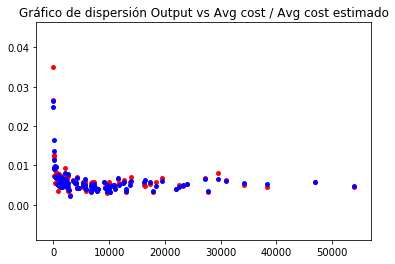

In [18]:
# graficamos resultados:

plt.scatter(dataframe2.output, dataframe2.avgcost, s = 15, color ="red")
plt.scatter(dataframe2.output, dataframe2.avgcost_e, s = 15, color ="blue")
plt.title("Gráfico de dispersión Output vs Avg cost / Avg cost estimado")
#
#
plt.show()


In [19]:
## 8. Guarde el Data Frame en un archivo CSV:

In [20]:
dataframe.to_csv('guardar.csv')